EN4553 - MACHINE VISION \\
CODING ASSIGNMENT

190504H - Ranatunga R.G.S.M.  
190497K - Ranasinghe R.A.D.V.C. \\
190095C - Bolonghe B.P.M. \\
190107T - Chathumini B.G.D.T.



In [1]:
import os
import datetime
import glob
import numpy as np
import tensorflow as tf # to import data
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from PIL import Image # for image manufulations
import keras
from keras import layers
from tensorflow import data as tf_data
from keras import callbacks
from PIL import Image
import seaborn as sns
import pathlib
import sklearn.manifold
import scipy.spatial
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

Part 1

In [ ]:
train_dataset, test_dataset = tfds.load('oxford_iiit_pet:3.2.0', split=['train', 'test'], as_supervised=True)

In [ ]:
# Load ResNet-50 model
resnet_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
# Function to preprocess and resize images
def preprocess_image(image, label):
    resized_image = tf.image.resize(image, (224, 224))
    normalized_image = tf.keras.applications.resnet.preprocess_input(resized_image)
    return normalized_image, label

# Extract embeddings from train set
train_data = train_dataset.map(preprocess_image)
train_data = train_data.batch(32, drop_remainder=True)  # Batch the dataset after preprocessing
# train_embeddings = resnet_model.predict(train_data)

# Extract labels from  train dataset
train_labels = np.concatenate([label.numpy() for _, label in train_data])

# Extract embeddings from test set
test_data = test_dataset.map(preprocess_image)
test_data = test_data.batch(32, drop_remainder=True)  # Batch the dataset after preprocessing
# test_embeddings = resnet_model.predict(test_data)

# Extract labels from test dataset
test_labels = np.concatenate([label.numpy() for _, label in test_data])

In [ ]:
# Extract embeddings from train set
train_embeddings = resnet_model.predict(train_data)
# Extract embeddings from test set
test_embeddings = resnet_model.predict(test_data)

# Flatten the embeddings
train_embeddings_flat = train_embeddings.reshape(len(train_embeddings), -1)
test_embeddings_flat = test_embeddings.reshape(len(test_embeddings), -1)

114/114 [==============================] - 18s 152ms/step


In [ ]:
print("Number of training samples:", len(train_embeddings_flat))
print("Number of training labels:", len(train_labels))
print("Number of test samples:", len(test_embeddings_flat))
print("Number of test labels:", len(test_labels))

Number of training samples: 3680
Number of training labels: 3680
Number of test samples: 3648
Number of test labels: 3648


In [ ]:
unique_train_labels = np.unique(train_labels)
unique_test_labels = np.unique(test_labels)

print("Unique labels in training set:", unique_train_labels)
print("Number of unique labels in training set:", len(unique_train_labels))

print("Unique labels in test set:", unique_test_labels)
print("Number of unique labels in test set:", len(unique_test_labels))

Unique labels in training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
Number of unique labels in training set: 37
Unique labels in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
Number of unique labels in test set: 37


[0.7957785087719298, 0.7817982456140351, 0.815515350877193, 0.8242872807017544, 0.8289473684210527, 0.8314144736842105, 0.8325109649122807, 0.8341557017543859, 0.8303179824561403, 0.8319627192982456, 0.8305921052631579, 0.8319627192982456, 0.8333333333333334, 0.8358004385964912, 0.8344298245614035, 0.840734649122807, 0.837171052631579]


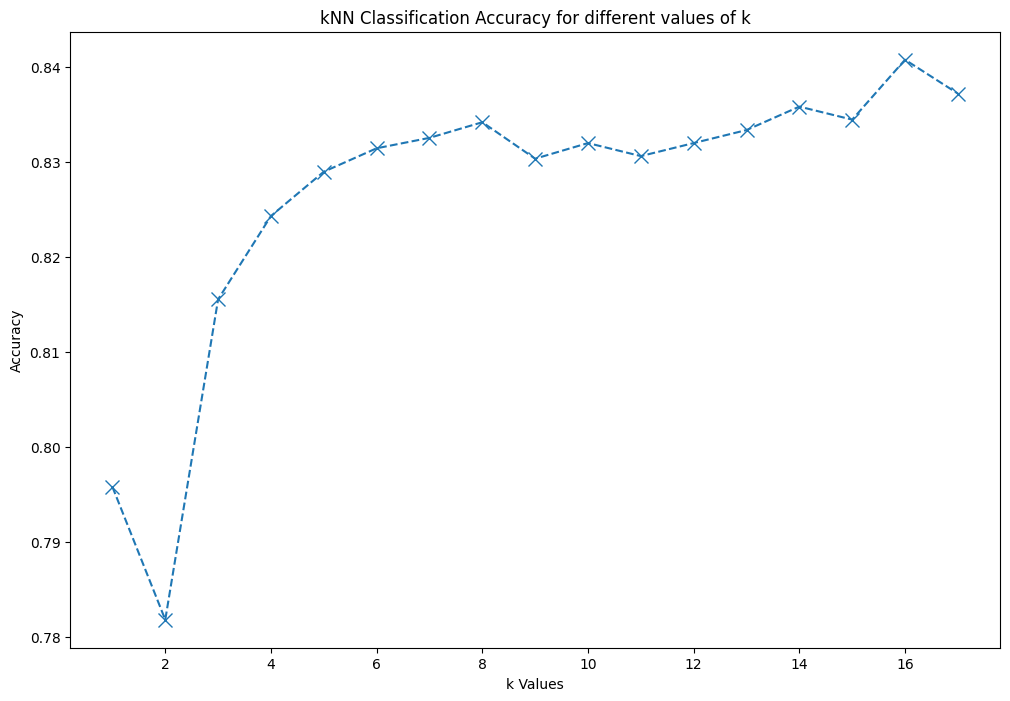

In [ ]:
# Convert labels to integer format
train_labels = np.array(train_labels).astype(int)
test_labels = np.array(test_labels).astype(int)

# Lists to store accuracy values for each k
accuracy_values = []

# Build k-NN classifier for each k
for k in range(1,18):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_embeddings_flat, train_labels)

    # Predict on the test set
    predictions = knn_classifier.predict(test_embeddings_flat)

    # Calculate accuracy and store it
    accuracy = accuracy_score(test_labels, predictions)
    accuracy_values.append(accuracy)

# Plotting
print(accuracy_values)
plt.figure(figsize = (12,8))
plt.plot(list(range(1,18)), accuracy_values, marker='x', linestyle="dashed", markersize=10)
plt.title('kNN Classification Accuracy for different values of k')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(max(accuracy_values))

0.840734649122807


In [ ]:
accuracy_values.index(max(accuracy_values))

15

Part 2 (Method 1)

In [ ]:
logreg_model = LogisticRegression(max_iter=1500)

# Train logistic regression model
logreg_model.fit(train_embeddings_flat, train_labels)
# Predict on the test set
logreg_predictions = logreg_model.predict(test_embeddings_flat)

# Calculate accuracy
logreg_accuracy = accuracy_score(test_labels, logreg_predictions)
print(f'Linear Classification Accuracy: {logreg_accuracy}')

Linear Classification Accuracy: 0.8955592105263158


In [ ]:
# Load the Oxford-IIIT Pet Dataset
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)
class_names = info.features['label'].names
print(class_names)
print(len(class_names))

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


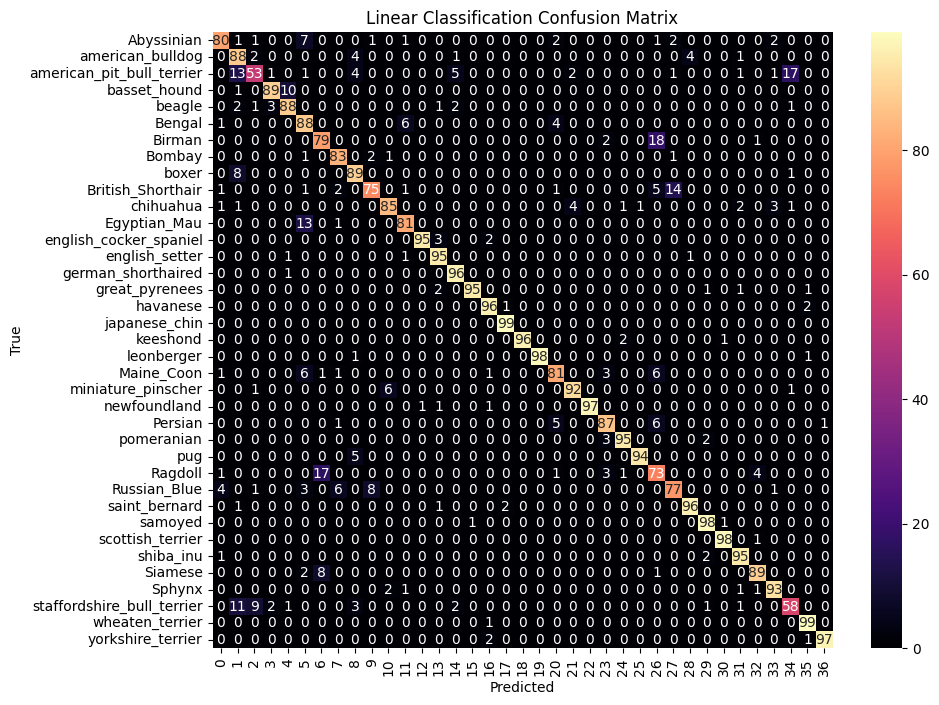

In [ ]:
classes = class_names

# Create a confusion matrix
cm = confusion_matrix(test_labels, logreg_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='magma', yticklabels=classes)
plt.title('Linear Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Part 2 (Method 2)

In [2]:
train_ds, validation_ds, test_ds = tfds.load('oxford_iiit_pet:3.2.0',split = ['train[:90%]', 'train[90%:100%]','test'], shuffle_files = True, as_supervised = True)

In [ ]:
print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {validation_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

Number of training samples: 3496
Number of validation samples: 184
Number of test samples: 3669


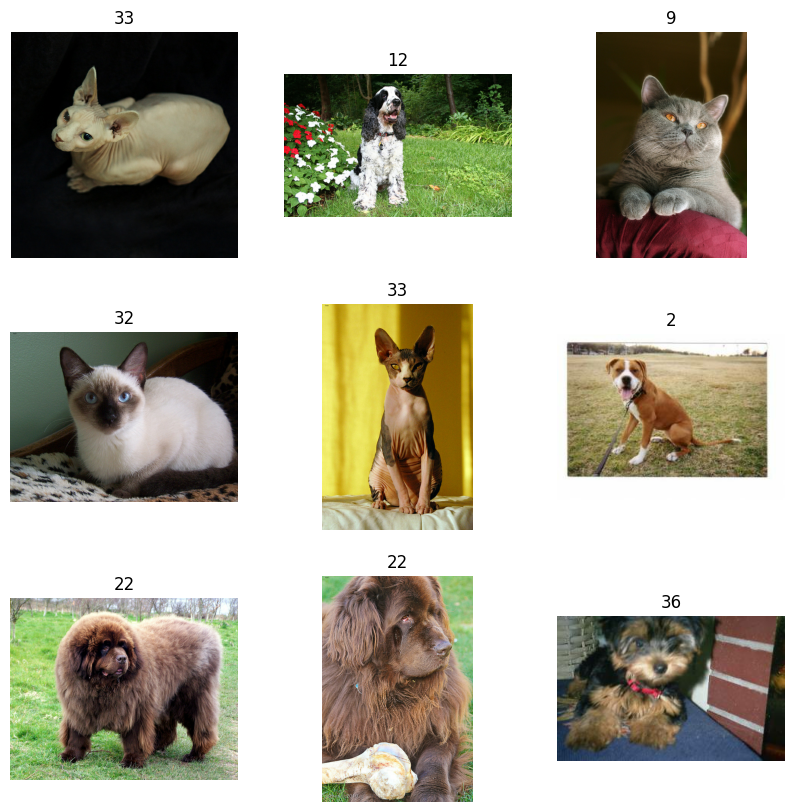

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [3]:
def process_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet.preprocess_input(tf.cast(image, tf.float32))
    return image, label

train_ds = train_ds.map(process_image)
validation_ds = validation_ds.map(process_image)
test_ds = test_ds.map(process_image)


In [4]:
batch_size = 32

train_ds = train_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
validation_ds = validation_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
test_ds = test_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()

In [5]:
base_model = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3), pooling = max)

In [6]:
base_model.trainable = False

# Create a new model on top
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)  # Add dropout for regularization
outputs = keras.layers.Dense(37, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 37)                75813     
                                                                 
Total params: 23663525 (90.27 MB)
Trainable params: 75813 (296.14 KB)
Non-trainable params: 23587712 (89.98 MB)
_______________

In [8]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0004, weight_decay = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, mode = "min", restore_best_weights = True)
history = model.fit(train_ds, epochs = 12, callbacks=[callback], validation_data = validation_ds, verbose=1)

Epoch 1/12
104/104 [==============================] - 36s 213ms/step - loss: 2.4244 - accuracy: 0.3602 - val_loss: 1.0753 - val_accuracy: 0.7418
Epoch 2/12
104/104 [==============================] - 12s 112ms/step - loss: 0.8344 - accuracy: 0.7814 - val_loss: 0.6554 - val_accuracy: 0.8397
Epoch 3/12
104/104 [==============================] - 12s 113ms/step - loss: 0.5071 - accuracy: 0.8681 - val_loss: 0.5225 - val_accuracy: 0.8614
Epoch 4/12
104/104 [==============================] - 12s 115ms/step - loss: 0.3796 - accuracy: 0.8998 - val_loss: 0.4706 - val_accuracy: 0.8696
Epoch 5/12
104/104 [==============================] - 11s 109ms/step - loss: 0.2948 - accuracy: 0.9233 - val_loss: 0.4170 - val_accuracy: 0.8804
Epoch 6/12
104/104 [==============================] - 11s 110ms/step - loss: 0.2315 - accuracy: 0.9435 - val_loss: 0.4055 - val_accuracy: 0.8696
Epoch 7/12
104/104 [==============================] - 12s 111ms/step - loss: 0.1912 - accuracy: 0.9565 - val_loss: 0.3812 - val_ac

In [9]:
print("Test dataset evaluation")
model.evaluate(test_ds)

Test dataset evaluation
115/115 [==============================] - 23s 195ms/step - loss: 0.3753 - accuracy: 0.8836


[0.3753112554550171, 0.883619487285614]

Part 3

In [6]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [7]:
for layer in base_model.layers:
    layer.trainable = True

model_ = Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.3),
  layers.Dense(37, activation = 'softmax')
])


In [8]:
model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 37)                75813     
                                                                 
Total params: 23663525 (90.27 MB)
Trainable params: 23610405 (90.07 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [9]:
# Compile the model with a lower learning rate to fine-tune the unfrozen layers
model_.compile(optimizer =keras.optimizers.Adam(learning_rate=0.00002, weight_decay=0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model with the same callbacks and epochs
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, mode = "min", restore_best_weights = True)
history = model_.fit(train_ds, epochs = 15, callbacks=[callback], validation_data = validation_ds)

Epoch 1/15
104/104 [==============================] - 98s 500ms/step - loss: 3.2956 - accuracy: 0.1567 - val_loss: 1.4889 - val_accuracy: 0.5978
Epoch 2/15
104/104 [==============================] - 41s 388ms/step - loss: 1.5296 - accuracy: 0.6205 - val_loss: 0.5984 - val_accuracy: 0.8261
Epoch 3/15
104/104 [==============================] - 38s 365ms/step - loss: 0.8418 - accuracy: 0.7880 - val_loss: 0.4847 - val_accuracy: 0.8370
Epoch 4/15
104/104 [==============================] - 40s 383ms/step - loss: 0.5731 - accuracy: 0.8493 - val_loss: 0.4146 - val_accuracy: 0.8614
Epoch 5/15
104/104 [==============================] - 39s 378ms/step - loss: 0.4215 - accuracy: 0.8883 - val_loss: 0.3925 - val_accuracy: 0.8696
Epoch 6/15
104/104 [==============================] - 39s 370ms/step - loss: 0.3120 - accuracy: 0.9209 - val_loss: 0.3572 - val_accuracy: 0.8777
Epoch 7/15
104/104 [==============================] - 39s 372ms/step - loss: 0.2390 - accuracy: 0.9396 - val_loss: 0.3373 - val_ac

In [ ]:
print("Test dataset evaluation")
model_.evaluate(test_ds)

Test dataset evaluation
101/115 [=========================>....] - ETA: 2s - loss: 0.4347 - accuracy: 0.8735